### Контекст.

Мы - интернет-магазин, который продает игры по всему миру. У нас есть данные из открытых источников о продажах игр, их рейтингах, отзывов критиков и пользователей и игровых платформах.

### Цель проекта.

Выявление закономерностей, определяющих успешность игры, чтобы спланировать рекламные акции на будущий год.

### План исследования.

- Изучаем общую информацию.
- Проводим предварительную обработку данных (при необходимости заполняем пропущенные значения, устраняем дубликаты, приводим столбцы к правильному типу данных).
- Проводим исследовательский анализ (проверяем влияние отзывов критиков и пользователей на продажи, смотрим распределение продаж игр по жанрам и выделяем самые успешные жанры).
- Составляем портрет пользователей из разных регионов (сравниваем предпочитаемые платформы, жанры и рейтинги).
- Проверяем гипотезы.
- Делаем общий вывод на основе исследования.

### Изучение общей информации.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy import stats as st

In [2]:
pd.set_option('display.max_columns', None)
warnings.simplefilter('ignore')

In [3]:
games = pd.read_csv('/datasets/games.csv')

In [4]:
games.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [5]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
games.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

In [7]:
games.duplicated().sum()

0

In [8]:
games['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Вывод.
- В названиях столбцов содержатся прописные буквы.
- Столбцы `Year_of_Release` и `User_Score` имеют неверный формат данных.
- В столбце `Rating` присутствуют неявные дубликаты (Е и К-А).
- В столбцах `Name`, `Year_of_Release`, `Genre`, `Critic_Score`, `User_Score` и `Rating` присутствуют пропуски в данных.

### Предобработка данных.

#### Переименовываем столбцы.

Названия столбцов приведем к нижнему регистру.

In [9]:
games.columns = games.columns.str.lower()

In [10]:
games.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

#### Удаляем неявные дубликаты.

Создадим функцию, чтобы не дублировать код.

In [11]:
def replace_val(column, old_val, new_val):
    games[column] = games[column].replace(old_val, new_val)

##### Дубликаты в столбце `rating`.

In [12]:
games['rating'].sort_values().unique()

array(['AO', 'E', 'E10+', 'EC', 'K-A', 'M', 'RP', 'T', nan], dtype=object)

Так как рейтинг К-А является устаревшим, заменяем его на современный аналог - Е.

In [13]:
replace_val('rating', 'K-A', 'E')

In [14]:
games['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'AO', 'EC', 'RP'], dtype=object)

##### Дубликаты в столбце `user_score`.

In [15]:
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Аббревиатура TBD - от английского To Be Determined (будет определено). Это означает, что оценки фактически нет, значит, можно заменить это значение на NaN.

In [16]:
replace_val('user_score', 'tbd', np.nan)

In [17]:
games['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

#### Удалаем пропуски в данных.

In [18]:
games['name'].unique()

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

- В столбце `name` удалим строки с пропущенными названиями игр, так как предложить какую-либо замену пропуску невозможно. Пропуск мог возникнуть из-за ошибки при выгрузке данных, либо при занесении в базу.
- Пропуски в столбце `year_of_release` тоже придется удалить, так как в названиях игр присутсвует обозначение года (например, LMA Manager 2007) и будет нелогичным выглядеть год выпуска, отличный от него. Пропуски могли возникнуть из-за программной ошибки при выгрузке, при внесении данных в базу, либо если у игры нет достоверно известных данных о дате выпуска.
- В столбце `genre` пропуски тоже удаляем, так как жанр зависит от игры и заполнять каким-либо частотным значением будет также нелогично. Пропуски могли возникнуть аналогично предыдущим: по техническим причинам, из-за человеческого фактора или если у игры не был определен жанр.

In [19]:
games.dropna(subset=['name', 'year_of_release', 'genre'], inplace=True)

In [20]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  float64
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   object 
 10  rating           9768 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB


#### Изменяем тип данных.

- Столбец `year_of_release` приводим к типу `int`.
- Столбец `user_score` приводим к типу `float`.

In [21]:
games['year_of_release'] = games['year_of_release'].astype(int)

In [22]:
games['user_score'] = games['user_score'].astype(float)

In [23]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


#### Заполняем пропущенные значения.

In [24]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

In [25]:
games['critic_score'] = games['critic_score'].fillna(-1)
games['user_score'] = games['user_score'].fillna(-1)

In [26]:
games.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score          0
user_score            0
rating             6676
dtype: int64

Удалять пропущенные значения из столбца `rating` не будем, потому что потеряем большое количество данных. Пропуски заполним значением `'Без рейтинга'`, так как он определяется в зависимости от игры, а заполнение наиболее частым значением может сильно исказить данные.

In [27]:
games['rating'] = games['rating'].fillna('Без рейтинга')

In [28]:
games.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Добавляем новый столбец.

Суммарное количество продаж по всем регионам.

In [29]:
games['total_sales'] = games[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)

In [30]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,-1.0,-1.0,Без рейтинга,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,-1.0,-1.0,Без рейтинга,31.38


### Исследовательский анализ данных.

Количество игр по годам.

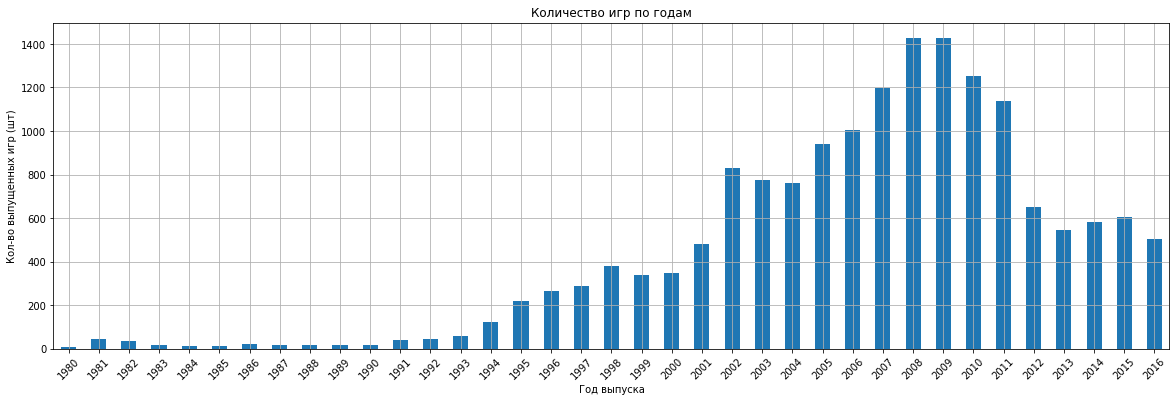

In [32]:
games.groupby('year_of_release')['name'].count()\
.plot(kind='bar',
      grid=True,
      rot=45,
      figsize=(20, 6),
      title='Количество игр по годам',
      xlabel='Год выпуска',
      ylabel='Кол-во выпущенных игр (шт)');

Распределение продаж по годам и платформам.

In [33]:
top_platform = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head()
top_platform

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

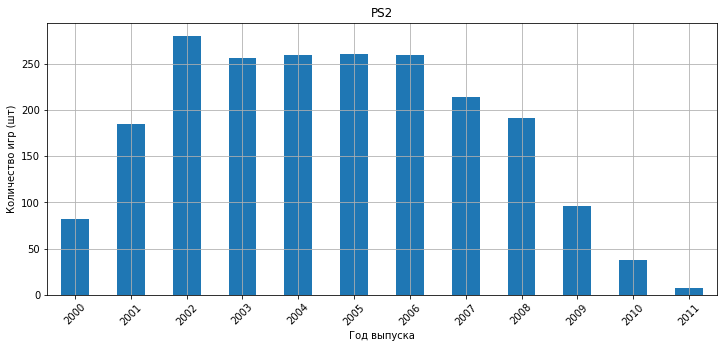

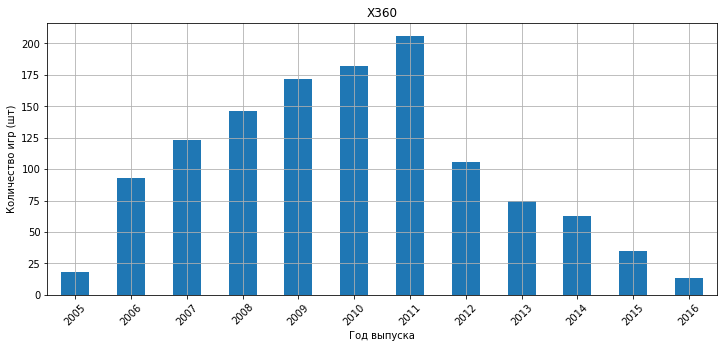

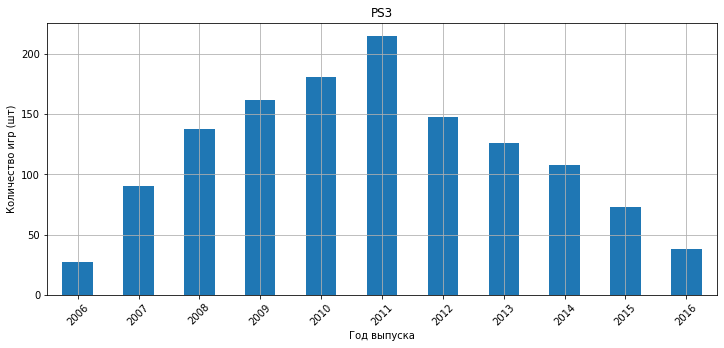

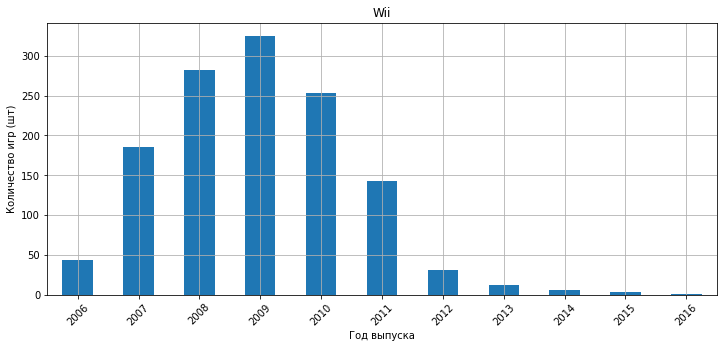

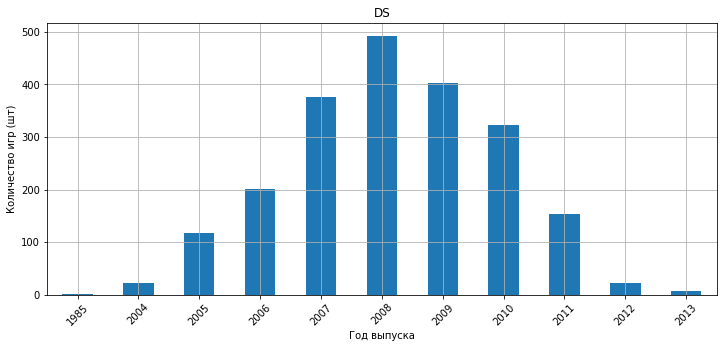

In [34]:
for platform in top_platform.index:
    games[games['platform'] == platform].groupby('year_of_release')['name'].count()\
    .plot(kind='bar',
          grid=True,
          rot=45,
          figsize=(12, 5),
          title=platform,
          xlabel='Год выпуска',
          ylabel='Количество игр (шт)')
    plt.show()

- На графиках видны ярко выраженные пики. Это наибольшая популярность данных платформ.
- До пика и после наблюдаются плавный рост популярности и плавное снижение. Исключение составляет PS2: после пика произошел небольшой спад, однако он держался на одном уровне еще в течение нескольких лет.
- Срок жизни платформ составляет в среднем 7 лет.

Для составления прогноза на 2017 год выберем данные за предыдущие 2 полных года: 2014 и 2015. Также включим в анализ текущий год (2016).

In [35]:
games_year = games.query('2014 <= year_of_release <= 2016')

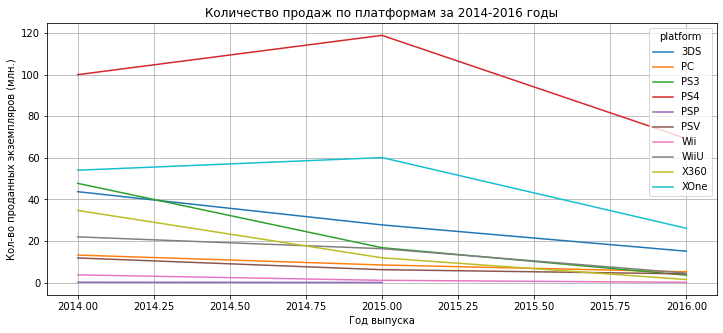

In [36]:
games_year.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')\
.plot(grid=True,
      figsize=(12, 5),
      title='Количество продаж по платформам за 2014-2016 годы',
      xlabel='Год выпуска',
      ylabel='Кол-во проданных экземпляров (млн.)');

- На графике видно, что продажи в течение 2014 года увеличивались только по двум платформам: PS4 и Xbox One. Они вышли на пик по продажам в 2015 году.
- По всем остальным платформам наблюдалось снижение продаж.
- В 2015 году платформа PSP прекратила свое существование.

In [37]:
games_year.pivot_table(index='platform', values=['na_sales', 'jp_sales', 'eu_sales', 'other_sales', 'total_sales'], aggfunc='sum')\
.sort_values(by='total_sales', ascending=False)

,eu_sales,jp_sales,na_sales,other_sales,total_sales
platform,,,,,
PS4,130.04,15.02,98.61,44.48,288.15
XOne,46.25,0.32,81.27,12.52,140.36
3DS,16.12,44.24,22.64,3.68,86.68
PS3,25.54,11.22,22.05,9.37,68.18
X360,15.49,0.08,28.30,4.35,48.22
WiiU,13.15,7.31,19.36,3.16,42.98
PC,17.97,0.00,7.23,1.85,27.05
PSV,3.53,14.54,2.52,1.81,22.40
Wii,2.59,0.00,2.08,0.40,5.07


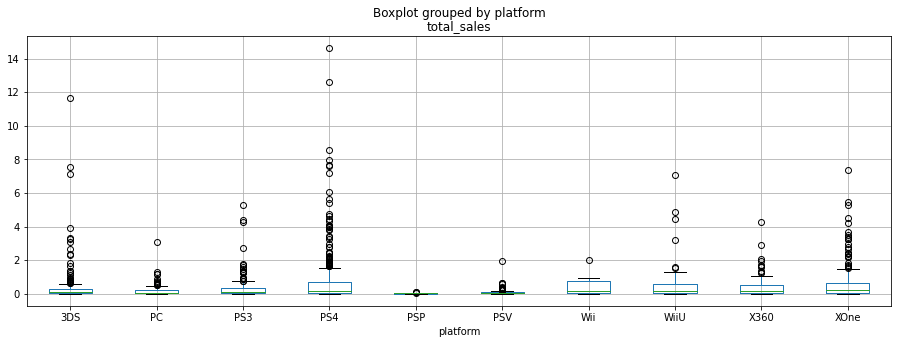

In [38]:
games_year.boxplot(by='platform', column='total_sales', figsize=(15, 5));

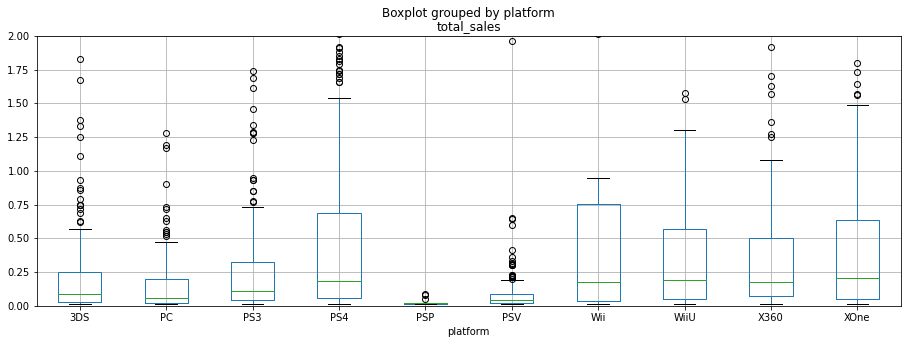

In [39]:
games_year.boxplot(by='platform', column='total_sales', figsize=(15, 5));
plt.ylim(0, 2)
plt.show()

На диаграмме размаха видны выбросы. Редкие выбросы - это игры, у которых получилось вырваться в топ продаж.

#### Влияние отзывов на продажи.

Для рассмотрения влияния отзывов на продажи возьмем самую многочисленную по продажам платформу - PS4 и по ней составим диаграмму рассеяния.

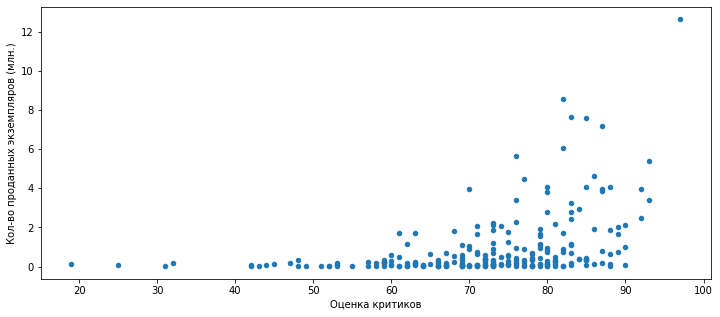

In [40]:
games_year[(games_year['platform'] == 'PS4') & (games_year['critic_score'] != -1)]\
.plot(kind='scatter',
      x='critic_score',
      y='total_sales',
      figsize=(12, 5),
      xlabel='Оценка критиков',
      ylabel='Кол-во проданных экземпляров (млн.)');

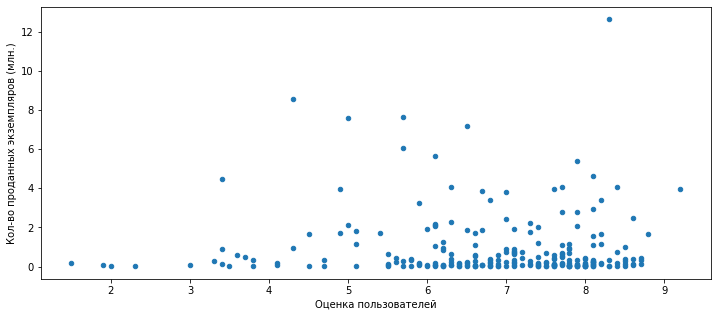

In [41]:
games_year[(games_year['platform'] == 'PS4') & (games_year['user_score'] != -1)]\
.plot(kind='scatter',
      x='user_score',
      y='total_sales',
      figsize=(12, 5),
      xlabel='Оценка пользователей',
      ylabel='Кол-во проданных экземпляров (млн.)');

Рассчитаем коэффициенты корреляции для этих диаграмм.

In [42]:
games_year[(games_year['platform'] == 'PS4') & (games_year['critic_score'] != -1)]['critic_score']\
.corr(games_year[games_year['platform'] == 'PS4']['total_sales'])

0.40266141068104083

In [43]:
games_year[(games_year['platform'] == 'PS4') & (games_year['user_score'] != -1)]['user_score']\
.corr(games_year[games_year['platform'] == 'PS4']['total_sales'])

-0.040131589472697356

**Вывод.**

- Большинство оценок, как критиков, так и пользователей, являются высокими и лежат примерно в одной плоскости.
- Корреляция является положительной по отзывам критиков (0.4).
- Корреляция является очень слабо отрицательной по отзывам пользователей (-0.04).

#### Сравнение результатов с продажами на других платформах.

In [44]:
top_platform = games_year.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(6)
top_platform

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
WiiU     42.98
Name: total_sales, dtype: float64

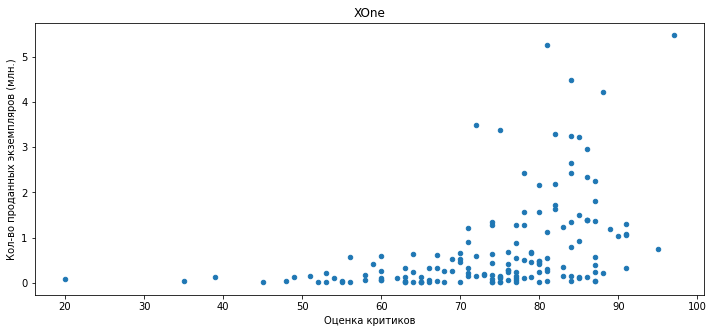

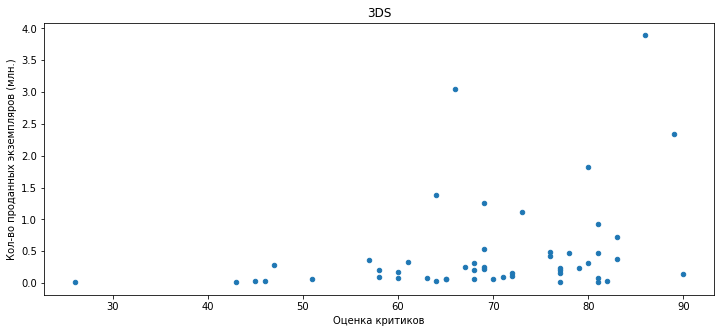

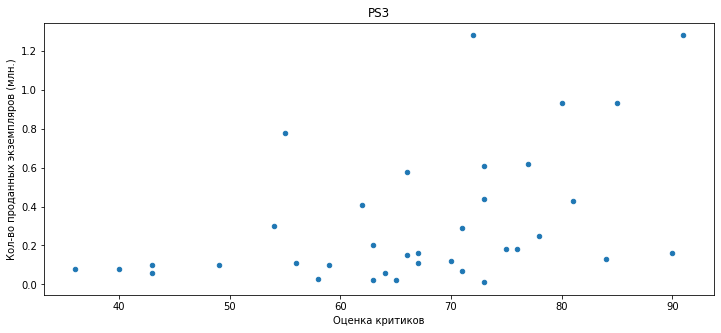

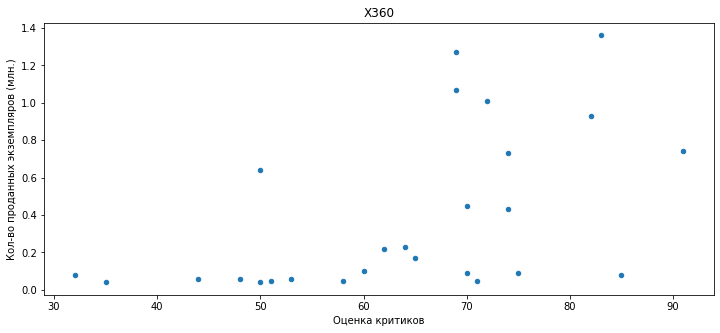

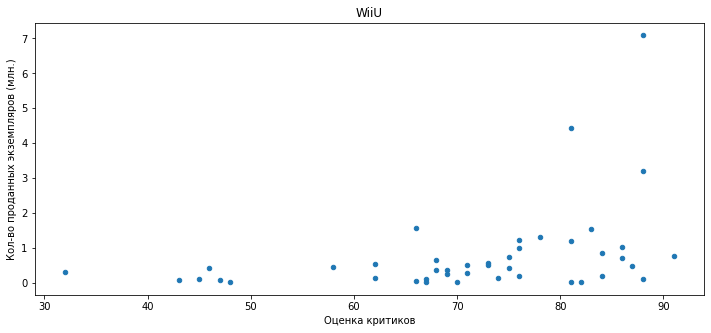

In [45]:
for platform in top_platform.index:
    if platform == 'PS4':
        continue
        
    games_year[(games_year['platform'] == platform) & (games_year['critic_score'] != -1)]\
    .plot(kind='scatter',
          x='critic_score',
          y='total_sales',
          figsize=(12, 5),
          title=platform,
          xlabel='Оценка критиков',
          ylabel='Кол-во проданных экземпляров (млн.)');

In [46]:
for platform in top_platform.index:
    if platform == 'PS4':
        continue
    
    print(f'Коэффициент корреляции ({platform}):', games_year[(games_year['platform'] == platform) & (games_year['critic_score'] != -1)]['critic_score']\
    .corr(games_year[games_year['platform'] == platform]['total_sales']))

Коэффициент корреляции (XOne): 0.42867694370333226
Коэффициент корреляции (3DS): 0.314117492869051
Коэффициент корреляции (PS3): 0.44657460493190704
Коэффициент корреляции (X360): 0.5257228356581523
Коэффициент корреляции (WiiU): 0.370201412480884


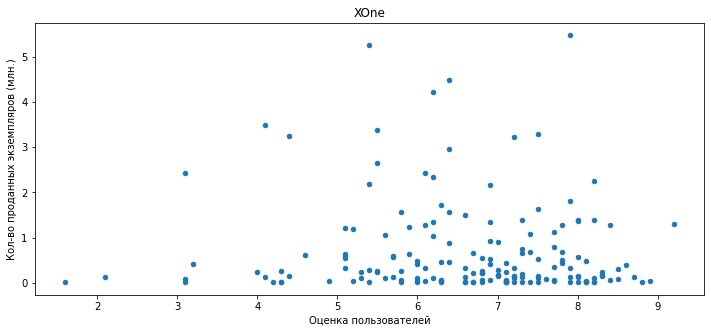

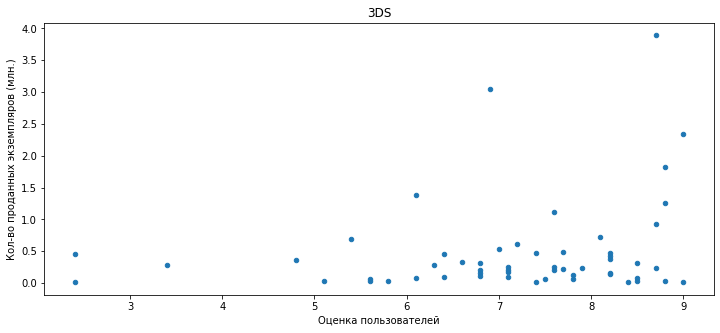

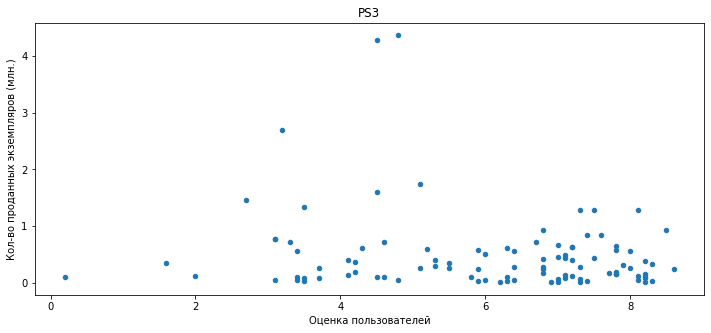

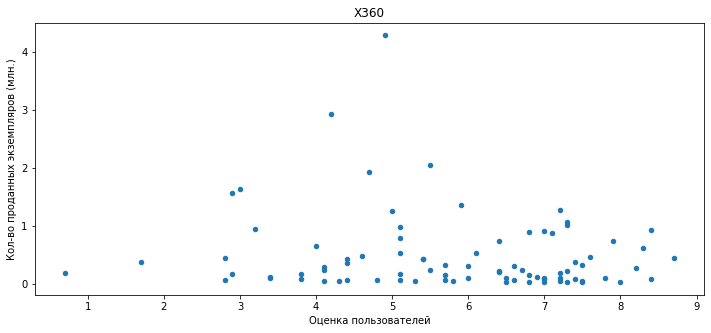

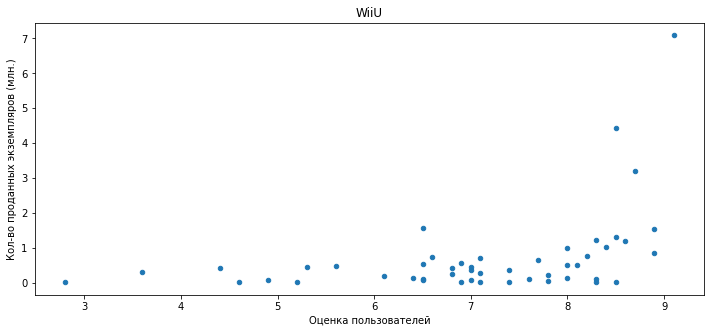

In [47]:
for platform in top_platform.index:
    if platform == 'PS4':
        continue
        
    games_year[(games_year['platform'] == platform) & (games_year['user_score'] != -1)]\
    .plot(kind='scatter',
          x='user_score',
          y='total_sales',
          figsize=(12, 5),
          title=platform,
          xlabel='Оценка пользователей',
          ylabel='Кол-во проданных экземпляров (млн.)');

In [48]:
for platform in top_platform.index:
    if platform == 'PS4':
        continue
    
    print(f'Коэффициент корреляции ({platform}):', games_year[(games_year['platform'] == platform) & (games_year['user_score'] != -1)]['critic_score']\
    .corr(games_year[games_year['platform'] == platform]['total_sales']))

Коэффициент корреляции (XOne): 0.3739757104764032
Коэффициент корреляции (3DS): 0.19440270629138728
Коэффициент корреляции (PS3): -0.15787264544204535
Коэффициент корреляции (X360): -0.05093163935204706
Коэффициент корреляции (WiiU): 0.33528386974160496


- Корреляция по отзывам критикам является положительной, что соотносится с данными по самой популярной платформе.
- По отзывам пользователей ситуация другая: только по двум платформам коэффициет соотносится с популярной платформой и является слабо отрицательным. По всем остальным коэффициент корреляции является слабо положительным.

#### Распределение игр по жанрам.

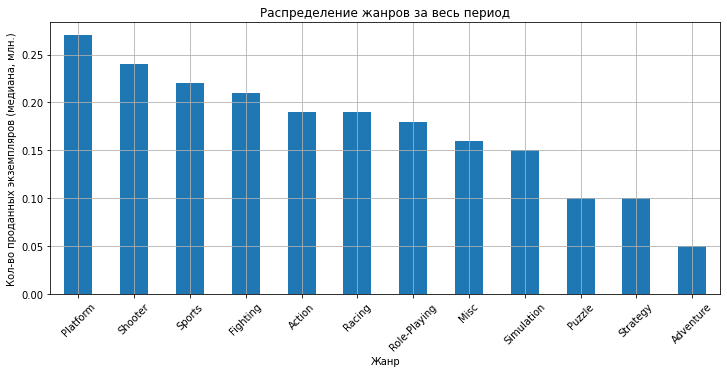

In [49]:
games.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.sort_values(by='total_sales', ascending=False)\
.plot(kind='bar',
      grid=True,
      rot=45,
      legend=False,
      figsize=(12, 5),
      title='Распределение жанров за весь период',
      xlabel='Жанр',
      ylabel='Кол-во проданных экземпляров (медиана, млн.)');

In [50]:
games.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Platform,0.27
Shooter,0.24
Sports,0.22
Fighting,0.21
Action,0.19
Racing,0.19
Role-Playing,0.18
Misc,0.16
Simulation,0.15


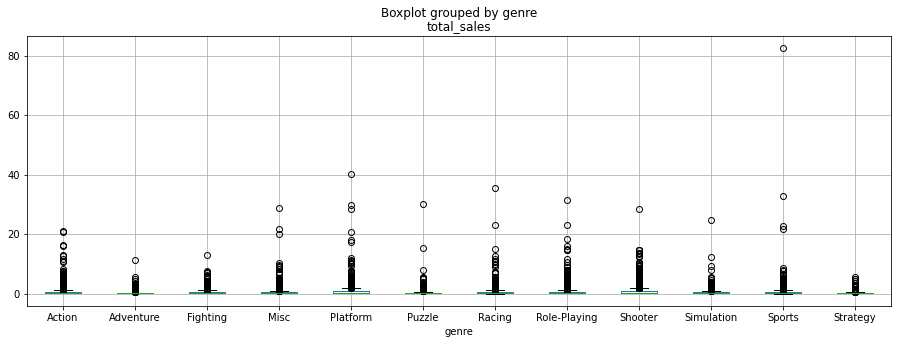

In [51]:
games.boxplot(by='genre', column='total_sales', figsize=(15, 5));

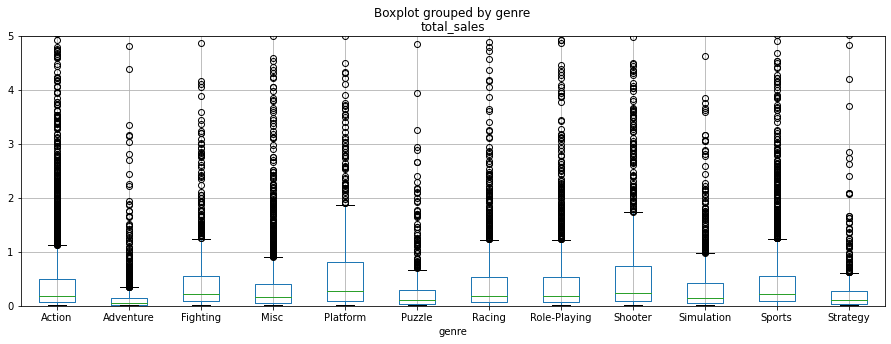

In [52]:
games.boxplot(by='genre', column='total_sales', figsize=(15, 5));
plt.ylim(0, 5)
plt.show()

- Среди данных за весь период можно выделить как самые популярные игры жанра `Platform`.
- Самые непопулярные - `Adventure`.

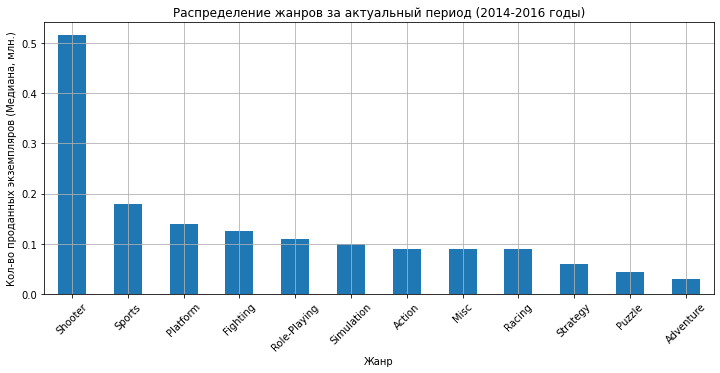

In [54]:
games_year.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.sort_values(by='total_sales', ascending=False)\
.plot(kind='bar',
      grid=True,
      rot=45,
      figsize=(12, 5),
      legend=False,
      title='Распределение жанров за актуальный период (2014-2016 годы)',
      xlabel='Жанр',
      ylabel='Кол-во проданных экземпляров (Медиана, млн.)');

In [55]:
games_year.pivot_table(index='genre', values='total_sales', aggfunc='median')\
.sort_values(by='total_sales', ascending=False)

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


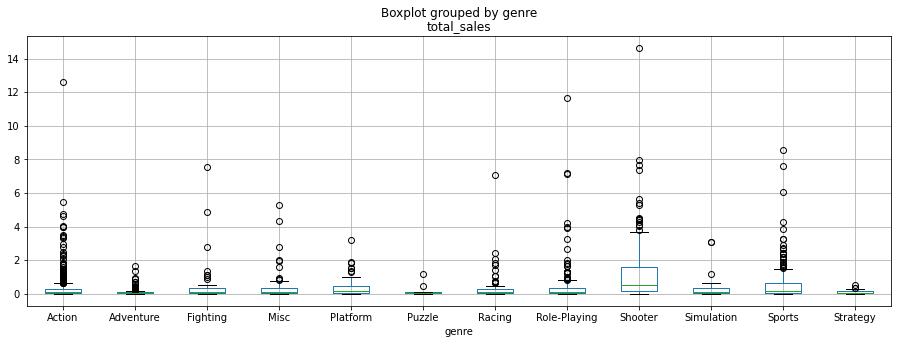

In [56]:
games_year.boxplot(by='genre', column='total_sales', figsize=(15, 5));

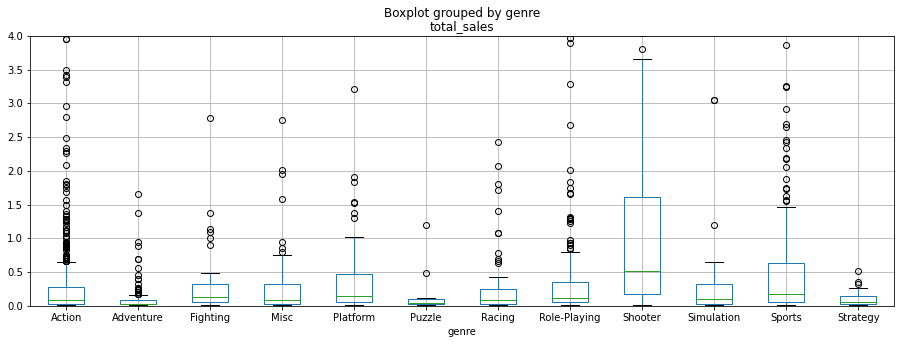

In [57]:
games_year.boxplot(by='genre', column='total_sales', figsize=(15, 5));
plt.ylim(0, 4)
plt.show()

- Среди выборки за актуальный период (2014-2016 годы) самым востребованным оказался жанр `Shooter`.
- Самым непопулярным по-прежнему остается `Adventure`.

### Портрет пользователя каждого региона.

In [58]:
def region_sort(region, by):
    return games_year.groupby(by)[region].sum().sort_values(ascending=False)

In [59]:
def percentage(platform, by):
    total_sales = games_year.groupby(by)['total_sales'].sum()
    return (platform / total_sales * 100).sort_values(ascending=False)

In [60]:
def bar_plot(data, title, xlabel):
    data.plot(kind='bar',
              grid=True,
              rot=45,
              figsize=(12, 5),
              title=title,
              xlabel=xlabel,
              ylabel='Кол-во проданных экземпляров (млн.)');

#### Портрет пользователя из Северной Америки.

##### Популярность платформ за актуальный период.

In [61]:
na_platform = region_sort('na_sales', 'platform').head()
na_platform

platform
PS4     98.61
XOne    81.27
X360    28.30
3DS     22.64
PS3     22.05
Name: na_sales, dtype: float64

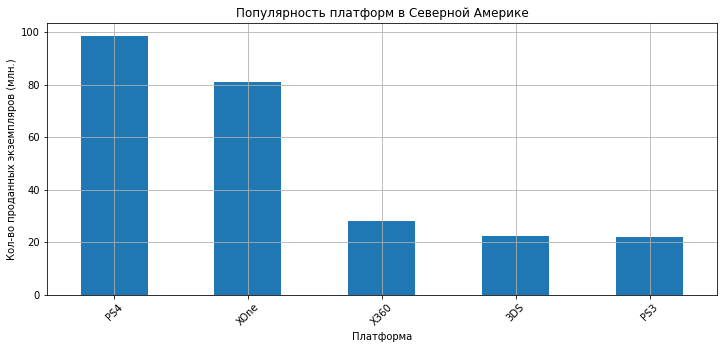

In [62]:
bar_plot(na_platform, 'Популярность платформ в Северной Америке', 'Платформа')

In [63]:
percentage(na_platform, 'platform').head()

platform
X360    58.689341
XOne    57.901111
PS4     34.221760
PS3     32.340862
3DS     26.119059
dtype: float64

Более 50% всех проданных игр на платформе Xbox 360 пришлось на Северную Америку.

##### Популярность жанров за актуальный период.

In [64]:
na_genre = region_sort('na_sales', 'genre').head()
na_genre

genre
Shooter         79.02
Action          72.53
Sports          46.13
Role-Playing    33.47
Misc            15.05
Name: na_sales, dtype: float64

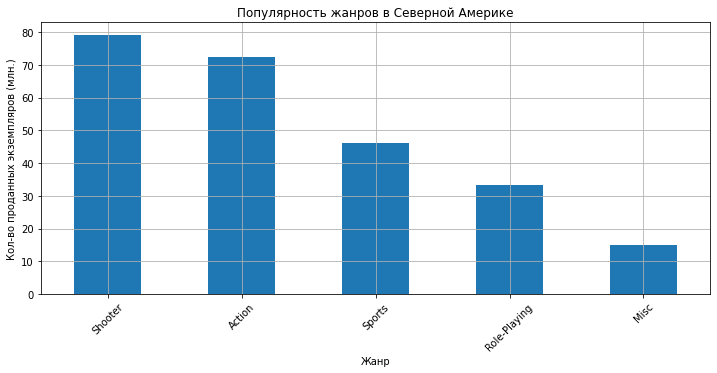

In [65]:
bar_plot(na_genre, 'Популярность жанров в Северной Америке', 'Жанр')

In [66]:
percentage(na_genre, 'genre').head()

genre
Shooter         46.226746
Sports          42.135550
Misc            40.079893
Action          36.381421
Role-Playing    32.994874
dtype: float64

Около половины всех проданных игр жанров `Sports` и `Shooter` приходятся на Северную Америку.

##### Влияние рейтинга ESRB на продажи за актуальный период.

In [67]:
na_rating = region_sort('na_sales', 'rating')
na_rating

rating
M               96.42
Без рейтинга    64.72
E               50.74
T               38.95
E10+            33.23
Name: na_sales, dtype: float64

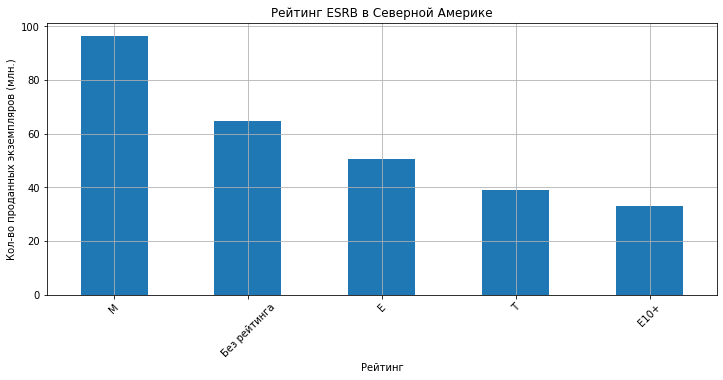

In [68]:
bar_plot(na_rating, 'Рейтинг ESRB в Северной Америке', 'Рейтинг')

#### Портрет пользователя из Европы.

##### Популярность платформ за актуальный период.

In [69]:
eu_platform = region_sort('eu_sales', 'platform').head()
eu_platform

platform
PS4     130.04
XOne     46.25
PS3      25.54
PC       17.97
3DS      16.12
Name: eu_sales, dtype: float64

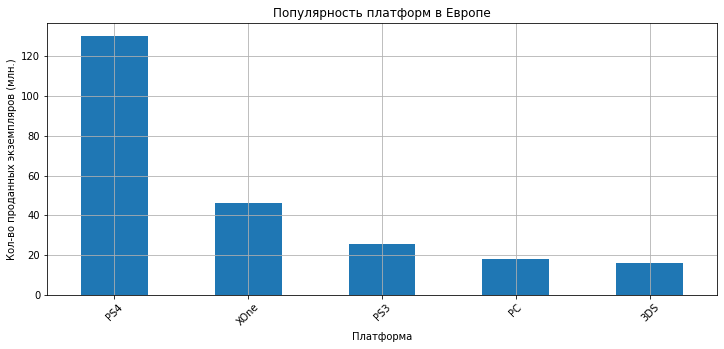

In [70]:
bar_plot(eu_platform, 'Популярность платформ в Европе', 'Платформа')

In [71]:
percentage(eu_platform, 'platform').head()

platform
PC      66.432532
PS4     45.129273
PS3     37.459666
XOne    32.950983
3DS     18.597139
dtype: float64

2/3 всех игр, которые продавались для PC, были приобретены в Европе.

##### Популярность жанров за актуальный период.

In [72]:
eu_genre = region_sort('eu_sales', 'genre').head()
eu_genre

genre
Action          74.68
Shooter         65.52
Sports          45.73
Role-Playing    28.17
Racing          14.13
Name: eu_sales, dtype: float64

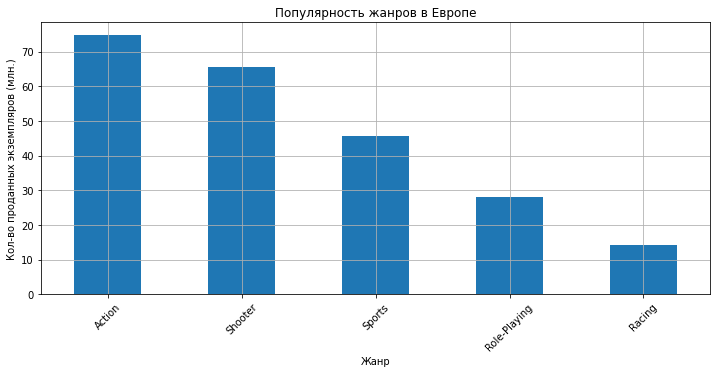

In [73]:
bar_plot(eu_genre, 'Популярность жанров в Европе', 'Жанр')

In [74]:
percentage(eu_genre, 'genre').head()

genre
Racing          51.344477
Sports          41.770186
Shooter         38.329238
Action          37.459872
Role-Playing    27.770110
dtype: float64

Половина всех проданных игр жанра `Racing` приходится на Европу.

##### Влияние рейтинга ESRB на продажи за актуальный период.

In [75]:
eu_rating = region_sort('eu_sales', 'rating')
eu_rating

rating
M               93.44
Без рейтинга    58.95
E               58.06
T               34.07
E10+            26.16
Name: eu_sales, dtype: float64

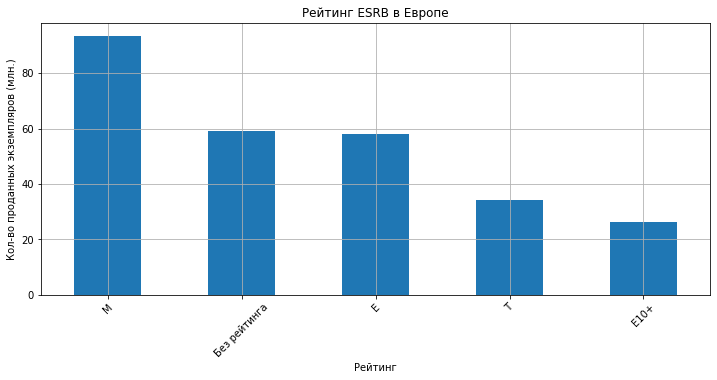

In [76]:
bar_plot(eu_rating, 'Рейтинг ESRB в Европе', 'Рейтинг')

#### Портрет пользователя из Японии.

##### Популярность платформ за актуальный период.

In [77]:
jp_platform = region_sort('jp_sales', 'platform').head()
jp_platform

platform
3DS     44.24
PS4     15.02
PSV     14.54
PS3     11.22
WiiU     7.31
Name: jp_sales, dtype: float64

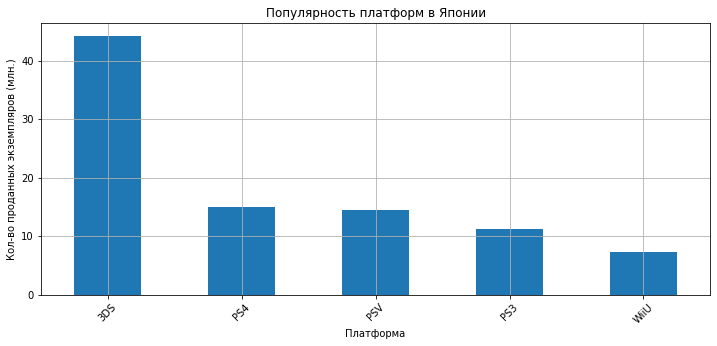

In [78]:
bar_plot(jp_platform, 'Популярность платформ в Японии', 'Платформа')

In [79]:
percentage(jp_platform, 'platform').head()

platform
PSV     64.910714
3DS     51.038302
WiiU    17.007911
PS3     16.456439
PS4      5.212563
dtype: float64

Более 60% игр на платформе PSV приобретено в Японии.

##### Популярность жанров за актуальный период.

In [80]:
jp_genre = region_sort('jp_sales', 'genre').head()
jp_genre

genre
Role-Playing    31.16
Action          29.58
Fighting         6.37
Misc             5.61
Shooter          4.87
Name: jp_sales, dtype: float64

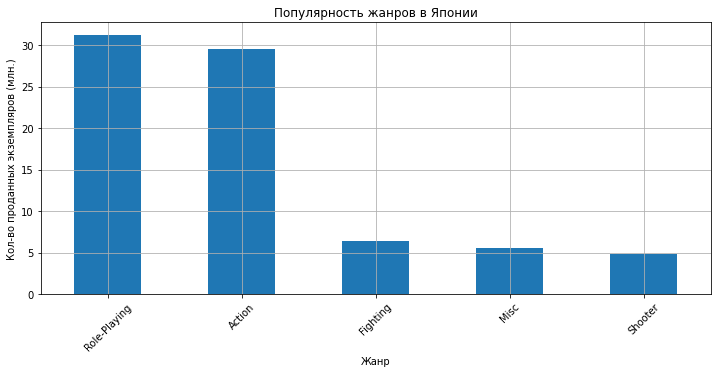

In [81]:
bar_plot(jp_genre, 'Популярность жанров в Японии', 'Жанр')

In [82]:
percentage(jp_genre, 'genre').head()

genre
Role-Playing    30.717666
Fighting        22.572644
Misc            14.940080
Action          14.837480
Shooter          2.848953
dtype: float64

1/3 игр жанра `Role-Playing` приходится на Японию.

##### Влияние рейтинга ESRB на продажи за актуальный период.

In [83]:
jp_rating = region_sort('jp_sales', 'rating')
jp_rating

rating
Без рейтинга    56.90
T               14.78
E                8.94
M                8.01
E10+             4.46
Name: jp_sales, dtype: float64

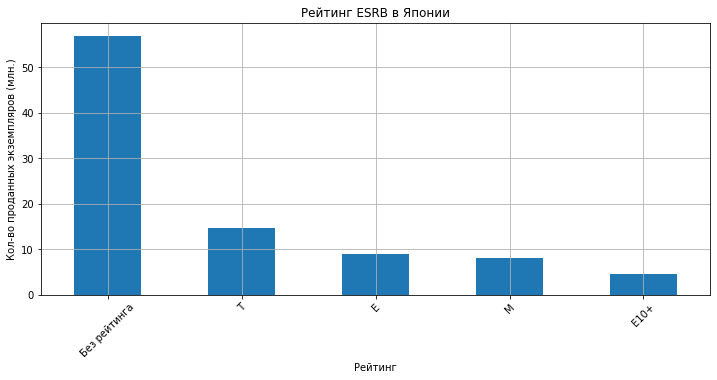

In [84]:
bar_plot(jp_rating, 'Рейтинг ESRB в Японии', 'Рейтинг')

#### Вывод.

- Портреты пользователей из Северной Америки и Европы по предпочитаемым игровым платформам совпадают. Среди них лидирует по популярности PS4. Второе место занимает Xbox One.
- С пользователями из Японии ситуация обстоит по-другому. В этом регионе первое место занимает Nintendo 3ds. На втором месте - PS4.
- Предпочтения пользователей из Северной Америки и Европы по игровым жанрам также совпадают. Самыми популярными в обоих регионах являются жанры: `Shooter`, `Action`, `Sports`, `Role-Playing`. На пятом месте по популярности в Северной Америке - `Misc`, а в Европе - `Racing`.
- В Японии можно выделить два самых популярных жанра: `Action`, `Role-Playing`. Остальные - `Shooter`, `Fighting`, `Misc` - имеют примерно одинаковую популярность, но значительно ниже, чем самые популярные.
- Предпочтения по рейтингу ESRB в Северной Америке и Европе тоже совпадают. Самыми востребованными являются игры с рейтингом М.
- В Японии с рейтингом ситуация другая: самые популярные игры не имеют рейтинга ESRB. Однако, если не брать его в расчет, то рейтинг Т является самым востребованным.

### Проверка гипотез.

#### Гипотеза 1: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые".

**Гипотеза Н0**: средние рейтинги платформ одинаковые.

**Гипотеза Н1**: средние рейтинги платформ разные.

In [85]:
xbox_user_rating_sample = games_year[(games_year['platform'] == 'XOne') & (games_year['user_score'] != -1)]['user_score']
pc_user_rating_sample = games_year[(games_year['platform'] == 'PC') & (games_year['user_score'] != -1)]['user_score']

alpha = .05

result = st.ttest_ind(xbox_user_rating_sample,
                      pc_user_rating_sample)

print('p-value:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 0.10450507919348415
Не получилось отвергнуть нулевую гипотезу


In [86]:
games_year[games_year['user_score'] != -1].groupby('platform')['user_score'].mean()

platform
3DS     7.138182
PC      6.298361
PS3     6.014286
PS4     6.828099
PSV     7.656164
Wii     6.350000
WiiU    7.087500
X360    5.771084
XOne    6.594545
Name: user_score, dtype: float64

#### Гипотеза 2: "Средние пользовательские рейтинги жанров Action и Sports разные".

**Гипотеза Н0**: средние рейтинги жанров одинаковые.

**Гипотеза Н1**: средние рейтинги жанров разные.

In [87]:
action_user_rating_sample = games_year[(games_year['genre'] == 'Action') & (games_year['user_score'] != -1)]['user_score']
sports_user_rating_sample = games_year[(games_year['genre'] == 'Sports') & (games_year['user_score'] != -1)]['user_score']

alpha = .05

result = st.ttest_ind(action_user_rating_sample,
                      sports_user_rating_sample)

print('p-value:', result.pvalue)

if result.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-value: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


In [88]:
games_year[games_year['user_score'] != -1].groupby('genre')['user_score'].mean()

genre
Action          6.760606
Adventure       7.470213
Fighting        6.983784
Misc            6.968293
Platform        6.741379
Puzzle          7.975000
Racing          6.327451
Role-Playing    7.348571
Shooter         6.549074
Simulation      6.504167
Sports          5.225197
Strategy        7.216667
Name: user_score, dtype: float64

- Так как нулевая гипотеза формулируется так, чтобы был использован знак равенства, то для первой гипотезы нулевая уже сформулирована в тексте; для второй гипотезы, наоборот, сформулирована альтернативная гипотеза, поэтому отталкиваясь от нее нужно сформулировать нулевую гипотезу с использованием знака равенства.
- Для проверки гипотез использовали двусторонний t-тест и t-критерий Стьюдента, так как мы хотим узнать отклонение значений в обе стороны от средних значений.

### Вывод.

Для прогнозирования кампании на 2017 год был выбран актуальный период: 2015-2016 годы.
- Исходя из результатов анализа, можно утверждать, что самой популярной игровой платформой является PS4.
- Самым востребованным среди игроков является жанр `Shooter`. Но не стоит забывать и о `Action` и `Sports`, так как они являются популярными в двух больших частях света: Северной Америке и Европе.
- Самые покупаемые игры имеют рейтинг М: материалы не подходят для лиц, младше 17 лет.

В ходе ииследования были проверены две гипотезы: "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" и "Средние пользовательские рейтинги жанров Action и Sports разные". Выводы по этим гипотезам можно сделать следующие:
- Пользовательские рейтинги платформ одинаковые.
- Пользовательские рейтинги жанров разные.